In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from scripts1 import project_functions
df = project_functions.load_and_process('../../data/raw/nomenclature.csv')

In [3]:
# returns how many rows and how many columns of dataset
print('Rows, Coulumns: ' + str(df.shape))

Rows, Coulumns: (15672, 9)


In [4]:
# returns the names of each columns
df.columns

Index(['index', 'Planet Name', 'ID', 'FeatureName', 'FeatureType',
       'Planetary Feature', 'Latitude of Center of Planetary Feature',
       'Longitude of Center of Planetary Feature',
       'Size of Planetary Feature(km)'],
      dtype='object')

In [5]:
# returns the amount of unique values for each variable
print(df.nunique(axis=0))

index                                       15672
Planet Name                                    45
ID                                          15661
FeatureName                                 15493
FeatureType                                    54
Planetary Feature                              54
Latitude of Center of Planetary Feature     13547
Longitude of Center of Planetary Feature    14201
Size of Planetary Feature(km)               12117
dtype: int64


In [6]:
# for my research questions below
df['Planet Name'].unique()

array(['Mars', 'Moon', 'Titan', 'Mercury', 'Dione', 'Rhea', 'Ganymede',
       'Ceres', 'Callisto', 'Triton', 'Mimas', 'Vesta', 'Europa', 'Pluto',
       'Venus', 'Ariel', 'Tethys', 'Oberon', 'Charon', 'Titania',
       'Miranda', 'Steins', 'Enceladus', 'Phobos', 'Eros', 'Epimetheus',
       'Iapetus', 'Amalthea', 'Thebe', 'Gaspra', 'Puck', 'Lutetia',
       'Deimos', 'Phoebe', 'Janus', 'Proteus', 'Hyperion', 'Ida',
       'Mathilde', 'Umbriel', 'Dactyl', 'Itokawa', 'Ryugu', 'Io', 'Bennu'],
      dtype=object)

In [7]:
df['FeatureType'].unique()

array([' albedo feature ', ' arcus ', ' catena ', ' cavus ', ' chaos ',
       ' chasma ', ' collis ', ' corona ', ' crater ', ' dorsum ',
       ' eruptive center ', ' facula ', ' farrum ', ' flexus ',
       ' fluctus ', ' flumen ', ' fossa ', ' fretum ', ' insula ',
       ' labes ', ' labyrinthus ', ' lacuna ', ' lacus ',
       ' landing site name ', ' large ringed feature ', ' linea ',
       ' lingula ', ' macula ', ' mare ', ' mensa ', ' mons ',
       ' oceanus ', ' palus ', ' patera ', ' planitia ', ' planum ',
       ' plume ', ' promontorium ', ' regio ', ' rima ', ' rupes ',
       ' satellite feature ', ' saxum ', ' scopulus ', ' serpens ',
       ' sinus ', ' sulcus ', ' terra ', ' tessera ', ' tholus ',
       ' unda ', ' vallis ', ' vastitas ', ' virga '], dtype=object)

In [8]:
# summarizes count, mean, min, max, and std. dev
df.describe().apply(lambda t: t.apply(lambda x: format(x, 'f')))

,index,ID,Latitude of Center of Planetary Feature,Longitude of Center of Planetary Feature,Size of Planetary Feature(km)
count,15672.000000,15672.000000,15672.000000,15672.000000,15672.000000
mean,7835.500000,7966.864472,-2.933297,178.191969,118.548312
std,4524.261045,4618.637890,38.367662,120.614301,388.762902
min,0.000000,1.000000,-89.667311,-171.850000,0.000000
25%,3917.750000,3929.750000,-32.392975,59.054023,8.882613
50%,7835.500000,8034.500000,-5.028775,175.174344,23.000000
75%,11753.250000,11978.250000,24.500574,300.309946,66.457725
max,15671.000000,15937.000000,89.551336,360.000000,11000.000000


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Planet Name,15672,45,Moon,9037
FeatureName,15672,15493,Kuiper,3
FeatureType,15672,54,satellite feature,7066
Planetary Feature,15672,54,SF,7066


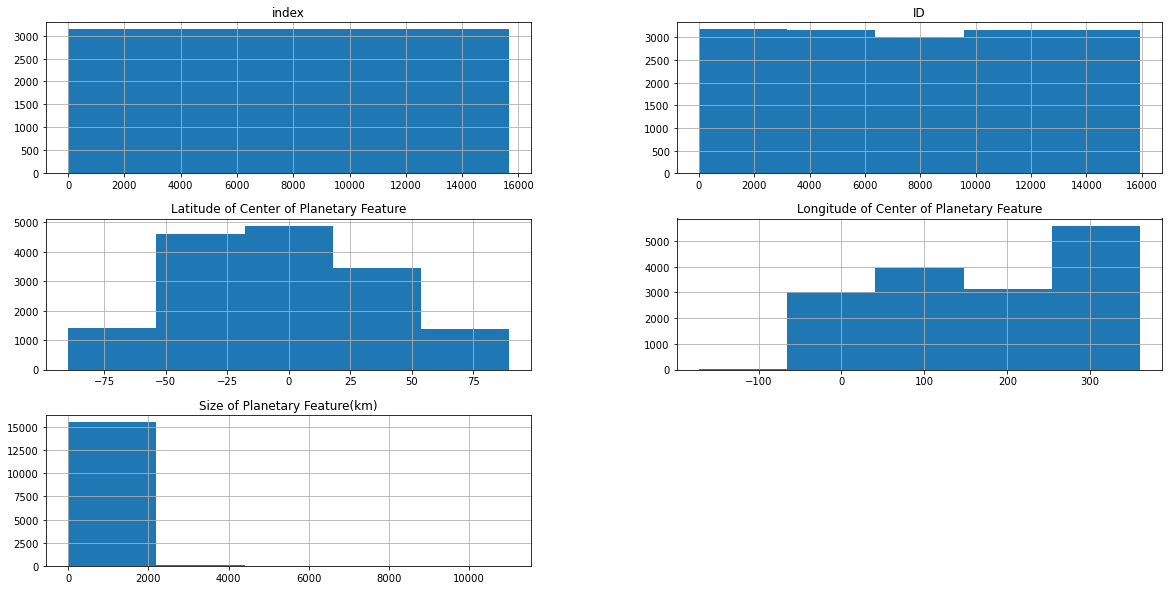

In [10]:
# histogram for each variable
hist = df.hist(bins=5,figsize=(20,10))

# Feature Type on Each Body

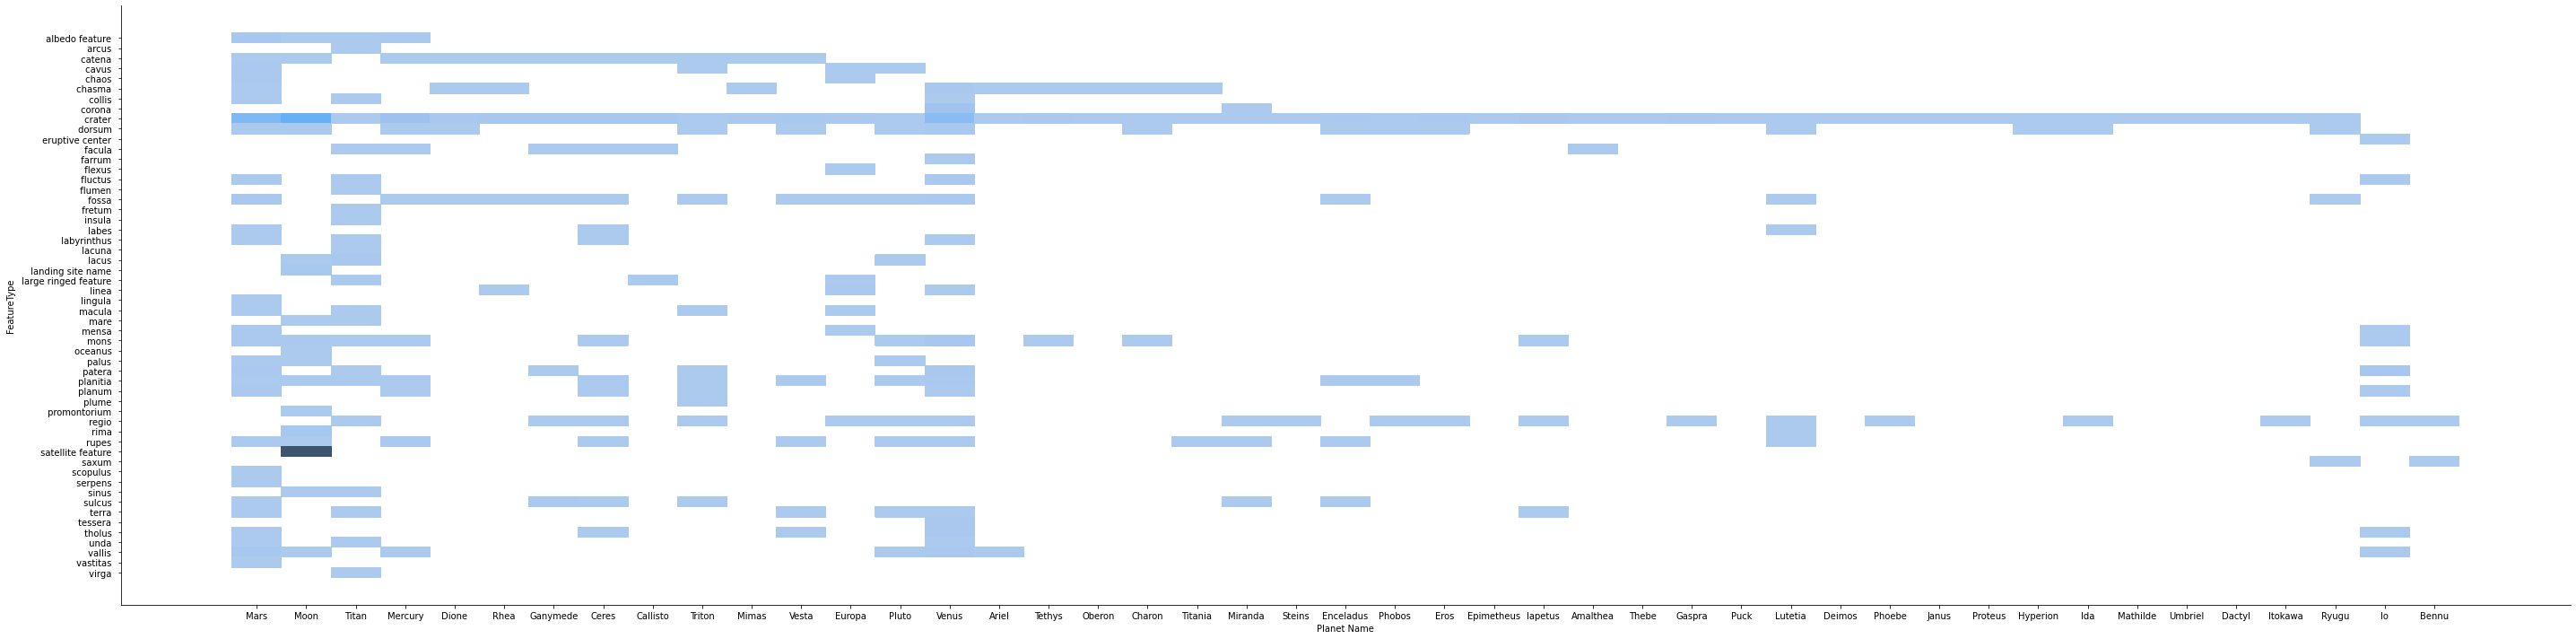

In [11]:
sns.displot(data=df, x='Planet Name', y='FeatureType', height= 10, aspect=4)

The above visualization creates a plot of each type of feature that appear on the body. Some planets have exclusive features while others have a wide variety of types. The opacity determines how frequent the feature appears on the planet/body. The more opaque, the more frequent and vice versa. For example the moon has a lot more satellite features and craters than anything and when compared to other bodies, one can see the moon has no regio features while titan has a decent amount. With this graph, we can answer the questions posed in the below visualizations.

# Largest Features by Feature Type

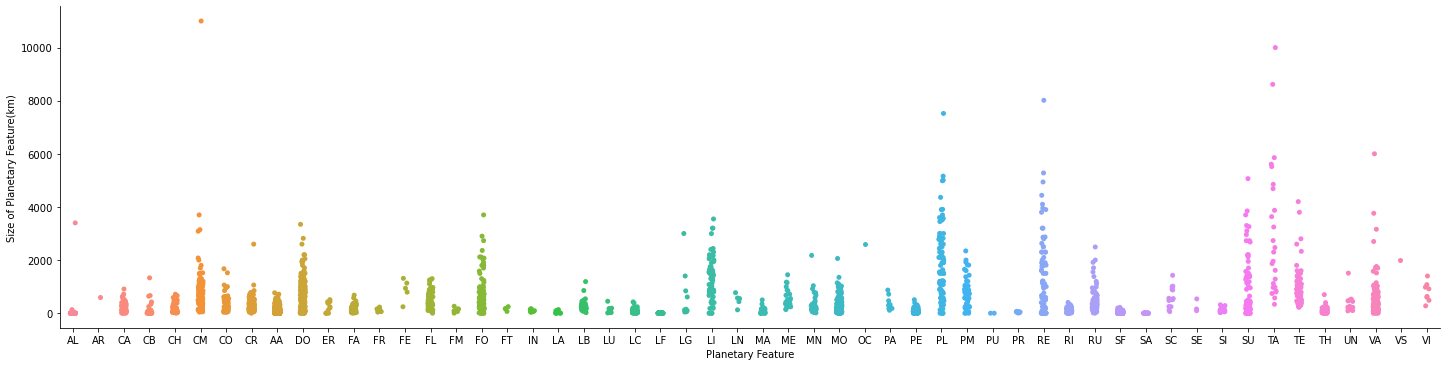

In [12]:
sns.catplot(data=df, x='Planetary Feature', y='Size of Planetary Feature(km)', aspect=4)

Now one can see the size of planetary feature, for each feature in the dataset. The use of abbreviated feature names is to keep the graph neat and tidy. Considering the above questions and visualization, one could narrow the differences among size between the planets to only a few features of note. For example; terra(TA), regio(RE), planitia(PL), and chasma(CM) are a few of the largest planetary features in the dataset and could yield intersting results as to why one is larger on one planet than another.

# Planets/Bodies with the Most Features

<AxesSubplot:xlabel='Planet Name', ylabel='count'>

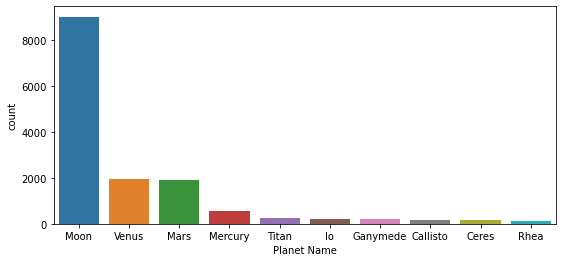

In [13]:
fig_dims = (9, 4)
plt.pyplot.figure(figsize=fig_dims)
top_bodies = df['Planet Name'].value_counts().index[:10]
sns.countplot(data=df, x='Planet Name',order=top_bodies)

# Size of Features on Top 10 Bodies

In [14]:
# Only include the top 10 bodies with the most features in the new df
top_10 = df[(df['Planet Name'] == 'Moon')|(df['Planet Name'] == 'Venus')|(df['Planet Name'] == 'Mars')|(df['Planet Name'] == 'Mercury')|(df['Planet Name'] == 'Titan')|(df['Planet Name'] == 'Io')|(df['Planet Name'] == 'Ganymede')|(df['Planet Name'] == 'Callisto')|(df['Planet Name'] == 'Ceres')|(df['Planet Name'] == 'Rhea')]

# Narrow down this data frame to the max valules of their feature size and drop any duplicate features. We want max per planet
top_10 = top_10.nlargest(500,'Size of Planetary Feature(km)',keep='first').drop_duplicates(subset='Planet Name')


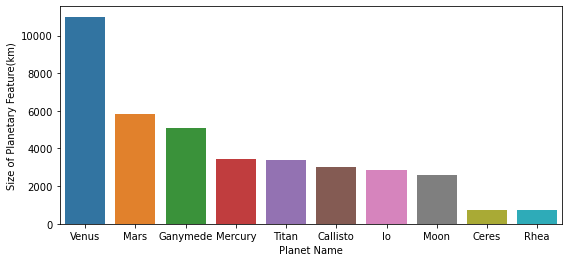

In [15]:
fig_dims = (9, 4)
plt.pyplot.figure(figsize=fig_dims)
bar_plot = sns.barplot(x='Planet Name', y='Size of Planetary Feature(km)', data=top_10)

A bar graph representing the top 10 bodies that have the most features within the dataset and how each planet's largest features compare to each others in size. For example, although the moon has the most features, its largest feature is smaller than those of Jupiter and Saturn's moons. Venus has the largest feature in the solar system; a giant chasma (a deep, elongated, steep-sided depression). These visualizations help us relate the planets by their feature size and allow us to ponder deeper questions. Does Venus have bigger mountains, craters, etc. than the moon and for what reason? Does it have to do with Venus' atmosphere, its place as the second planet away from the Sun, the Sun's gravity, etc. 

# Exclusive Features
## Locations of Active Volcanoes on Io

<AxesSubplot:xlabel='Longitude of Center of Planetary Feature', ylabel='Latitude of Center of Planetary Feature'>

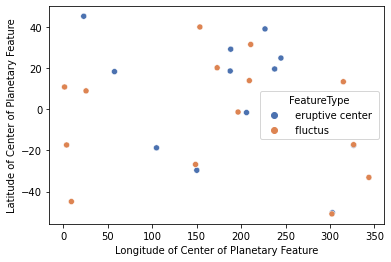

In [16]:
iodata = df[df['Planet Name'] == 'Io']
iodata_er = iodata[(iodata['Planetary Feature']=='ER')|(iodata['Planetary Feature']=='FL')]
sns.scatterplot(data=iodata_er,x='Longitude of Center of Planetary Feature', y='Latitude of Center of Planetary Feature', hue='FeatureType', palette='deep')

What could the close grouping of volcanoes in the Longitude = 200-250 range and Latitude = 15-25 range represent?
The data points labeled fluctus represent flow terrain and where they are located on Io. I was wondering if FL could show past inactive volcanic sites if the flow terrain is correlated to the locations of active/inactive volcanoes.